<a href="https://colab.research.google.com/github/tharani694/SLC-Project1/blob/main/CT_2_SC_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Classification

#### You are hired by one of the leading news channels CNBE who wants to analyse recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict overall win and seats covered by a particular party.

1.1)Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc. Null value check, Summary stats, Skewness must be discussed.

1.2)Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

1.3)Encode the data (having string values) for Modelling. Is Scaling necessary here or not, Data Split: Split the data into train and test (70:30) The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models Data split, ratio defined for the split, train-test split should be discussed.

1.4)Apply Decision Tree and Random Forest Model. Interpret the inferences of each model. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validation of models (over fitting or under fitting)

1.5) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner


# 1.1

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_excel("Election_Data.xlsx",sheet_name=1)
data.drop(columns='Unnamed: 0',axis=1,inplace=True)

# Exploratory Data Analysis

#### 5 Instances of the Dataset using head and tail commands

In [27]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [28]:
data.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [29]:
data.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [31]:
data.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [32]:
data.shape

(1525, 9)

In [33]:
data.count()

vote                       1525
age                        1525
economic.cond.national     1525
economic.cond.household    1525
Blair                      1525
Hague                      1525
Europe                     1525
political.knowledge        1525
gender                     1525
dtype: int64

In [34]:
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [35]:
# TO check for duplicates

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1520    False
1521    False
1522    False
1523    False
1524    False
Length: 1525, dtype: bool

In [36]:
data.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [37]:
data.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

## Declaring Input and Outpt variables

In [38]:
X = data.drop('vote',axis=1)
y = data.vote

In [39]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,female
1,36,4,4,4,4,5,2,male
2,35,4,4,5,2,3,2,male
3,24,4,2,2,1,4,0,female
4,41,2,2,1,1,6,2,male


In [40]:
X.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

In [41]:
X.age.value_counts()

37    42
49    39
35    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: age, Length: 70, dtype: int64

In [42]:
y.head()

0    Labour
1    Labour
2    Labour
3    Labour
4    Labour
Name: vote, dtype: object

In [43]:
y.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

# Univariate Analysis

### Charts

#### Distribution PLot and Box plot

Text(0.5, 1.0, 'Blair boxplot')

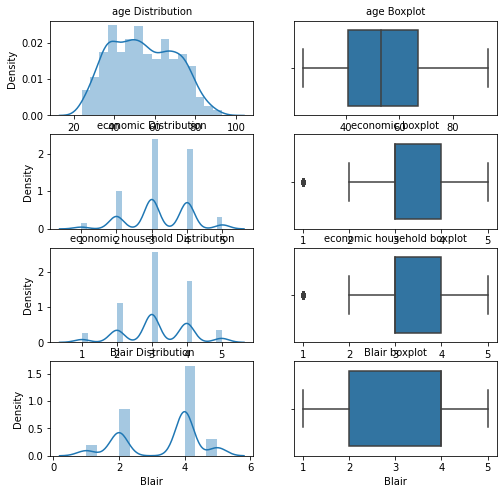

In [79]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(8,8)
a = sns.distplot(data['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(data['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(data['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(data['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(data['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(data['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(data['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(data['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

Text(0.5, 1.0, 'political knowledge boxplot')

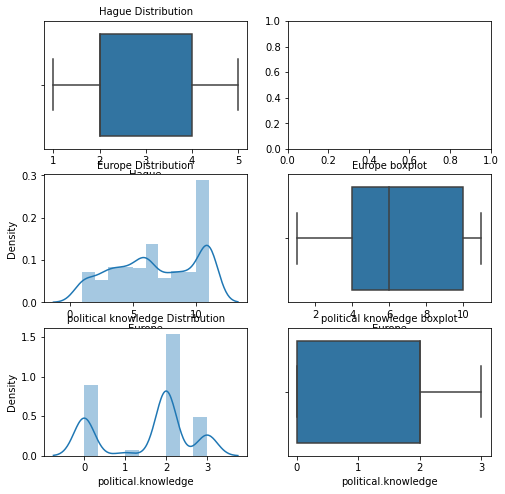

In [78]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(8,8)
#a = sns.distplot(data['Hague'] , ax=axes[0][0])
#a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(data["Hague"] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

#a = sns.boxplot(data['Hague'] , orient = "v" , ax=axes[0][1])
#a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(data['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(data['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(data['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(data['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)


#### Histogram Chart

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0972d80e50>,
      dtype=object)

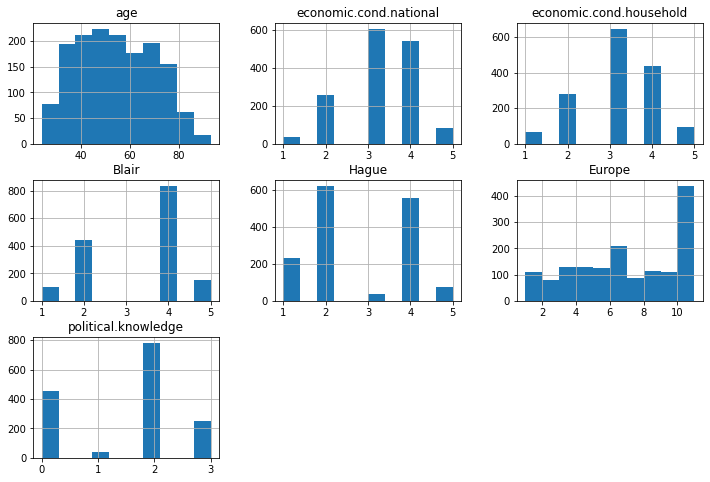

In [76]:
data.hist(figsize=(12,8))

#### BoxPLot

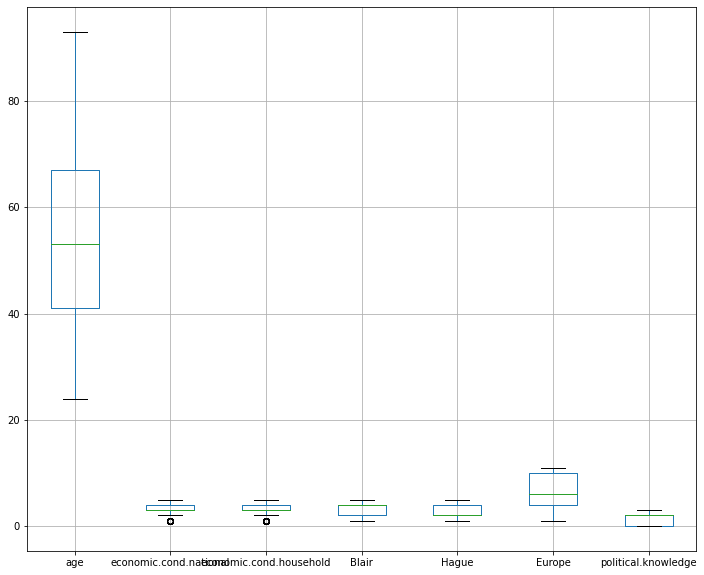

In [77]:
plt.figure(figsize=(12,10))
data.boxplot()

#### No Outliers found from the above box plot interpretation

## Statistics Summary

#### Measures of central tendency

In [48]:
data.mean()

age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64

In [49]:
data.mode()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,37,3,3,4,2,11,2,female


#### Measure of Dispersion

In [50]:
data.var()

age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
dtype: float64

In [51]:
data.std()

age                        15.711209
economic.cond.national      0.880969
economic.cond.household     0.929951
Blair                       1.174824
Hague                       1.230703
Europe                      3.297538
political.knowledge         1.083315
dtype: float64

# Bivariate Analysis

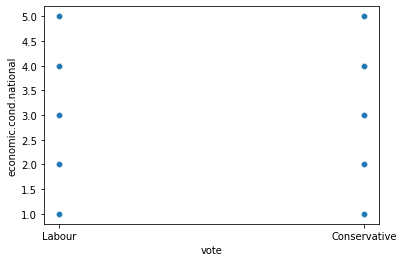

In [52]:
plt.figure()
sns.scatterplot(data["vote"], data['economic.cond.national']) 
plt.show()

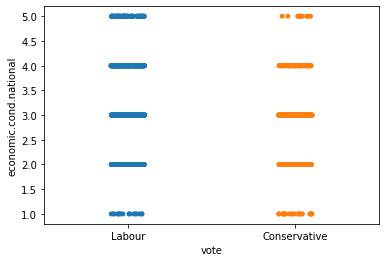

In [53]:
plt.figure()
sns.stripplot(data["vote"], data['economic.cond.national'], jitter=True) 
plt.show()

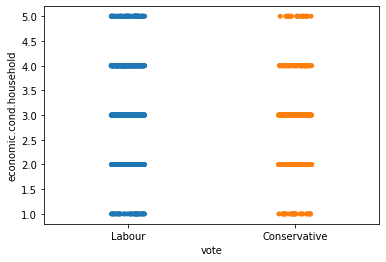

In [54]:
sns.stripplot(data["vote"], data['economic.cond.household'], jitter=True) 
plt.show()

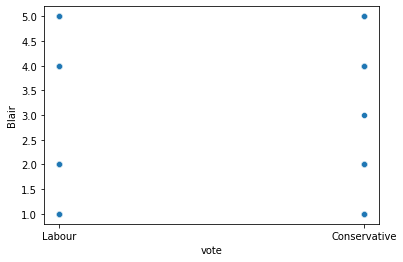

In [55]:
sns.scatterplot(data["vote"], data['Blair']) 
plt.show()

In [56]:
#sns.stripplot(data["vote"], data['Hague'], jitter=True) 
#plt.show()

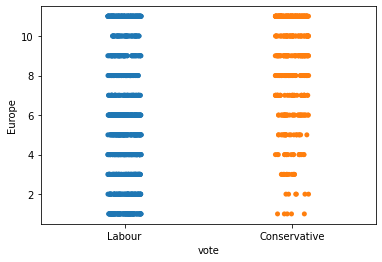

In [57]:
sns.stripplot(data["vote"], data['Europe'], jitter=True) 
plt.show()

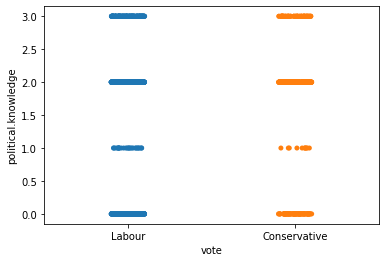

In [58]:
sns.stripplot(data["vote"], data['political.knowledge'], jitter=True) 
plt.show()

### Heatmap

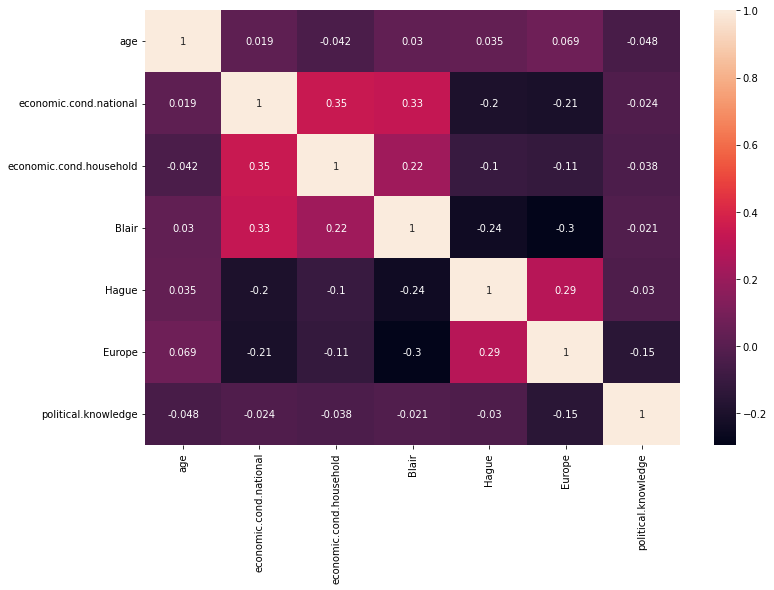

In [59]:
plt.figure(figsize=(12,8))
hm = sns.heatmap(data.corr(), annot=True )

### Pairplot

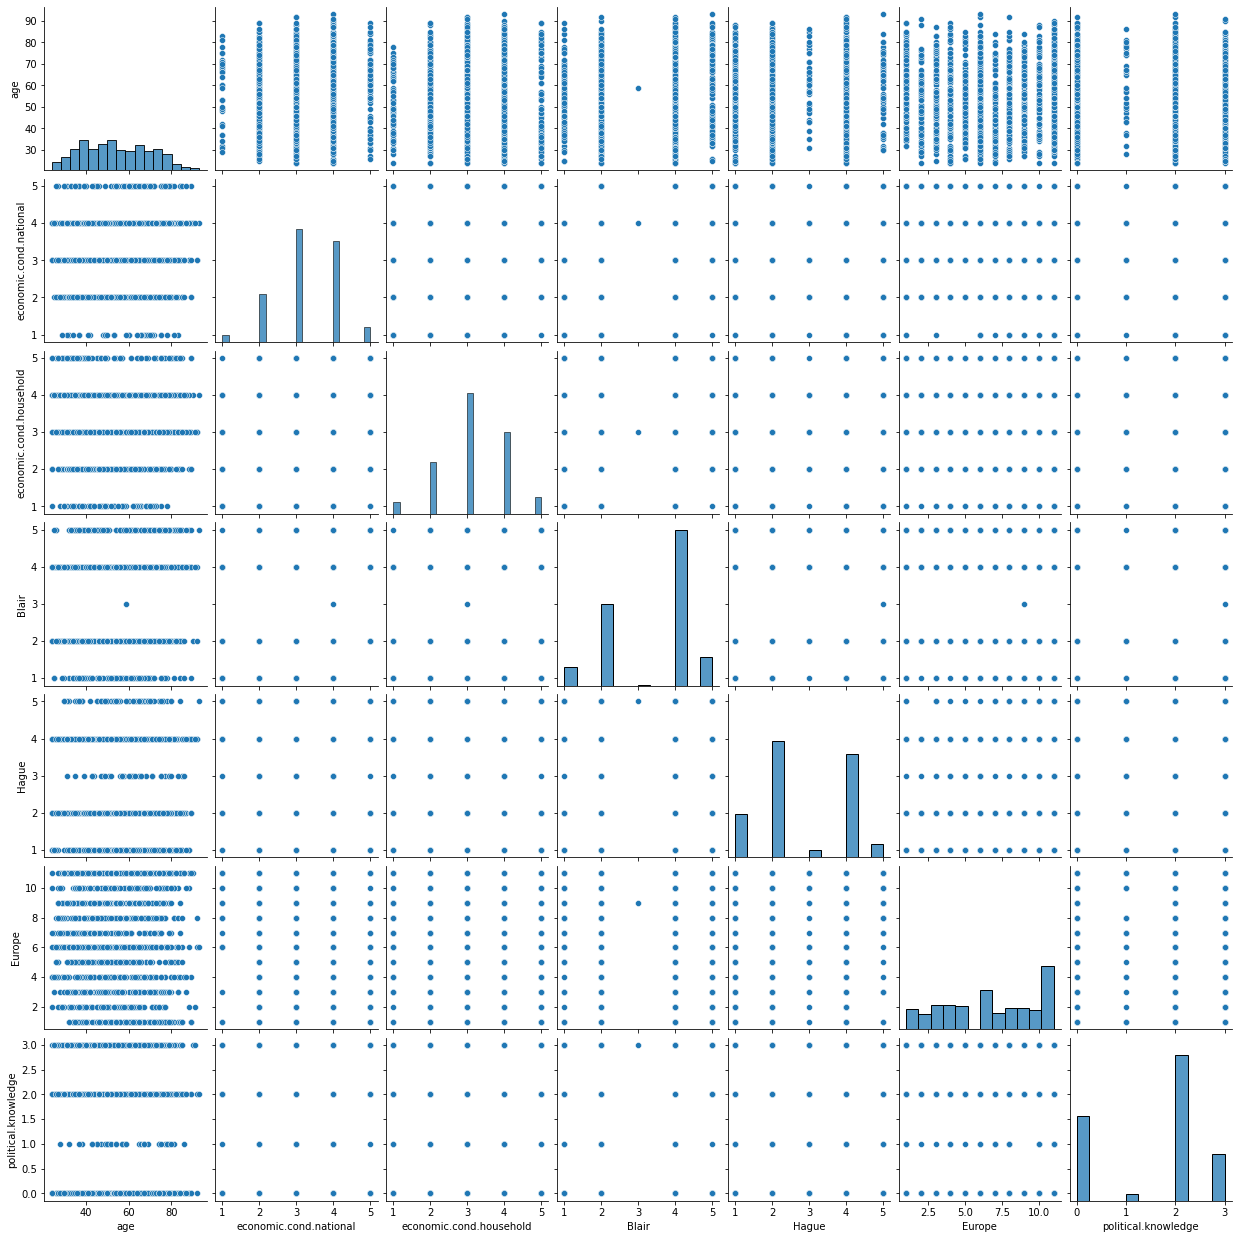

In [60]:
sns.pairplot(data)

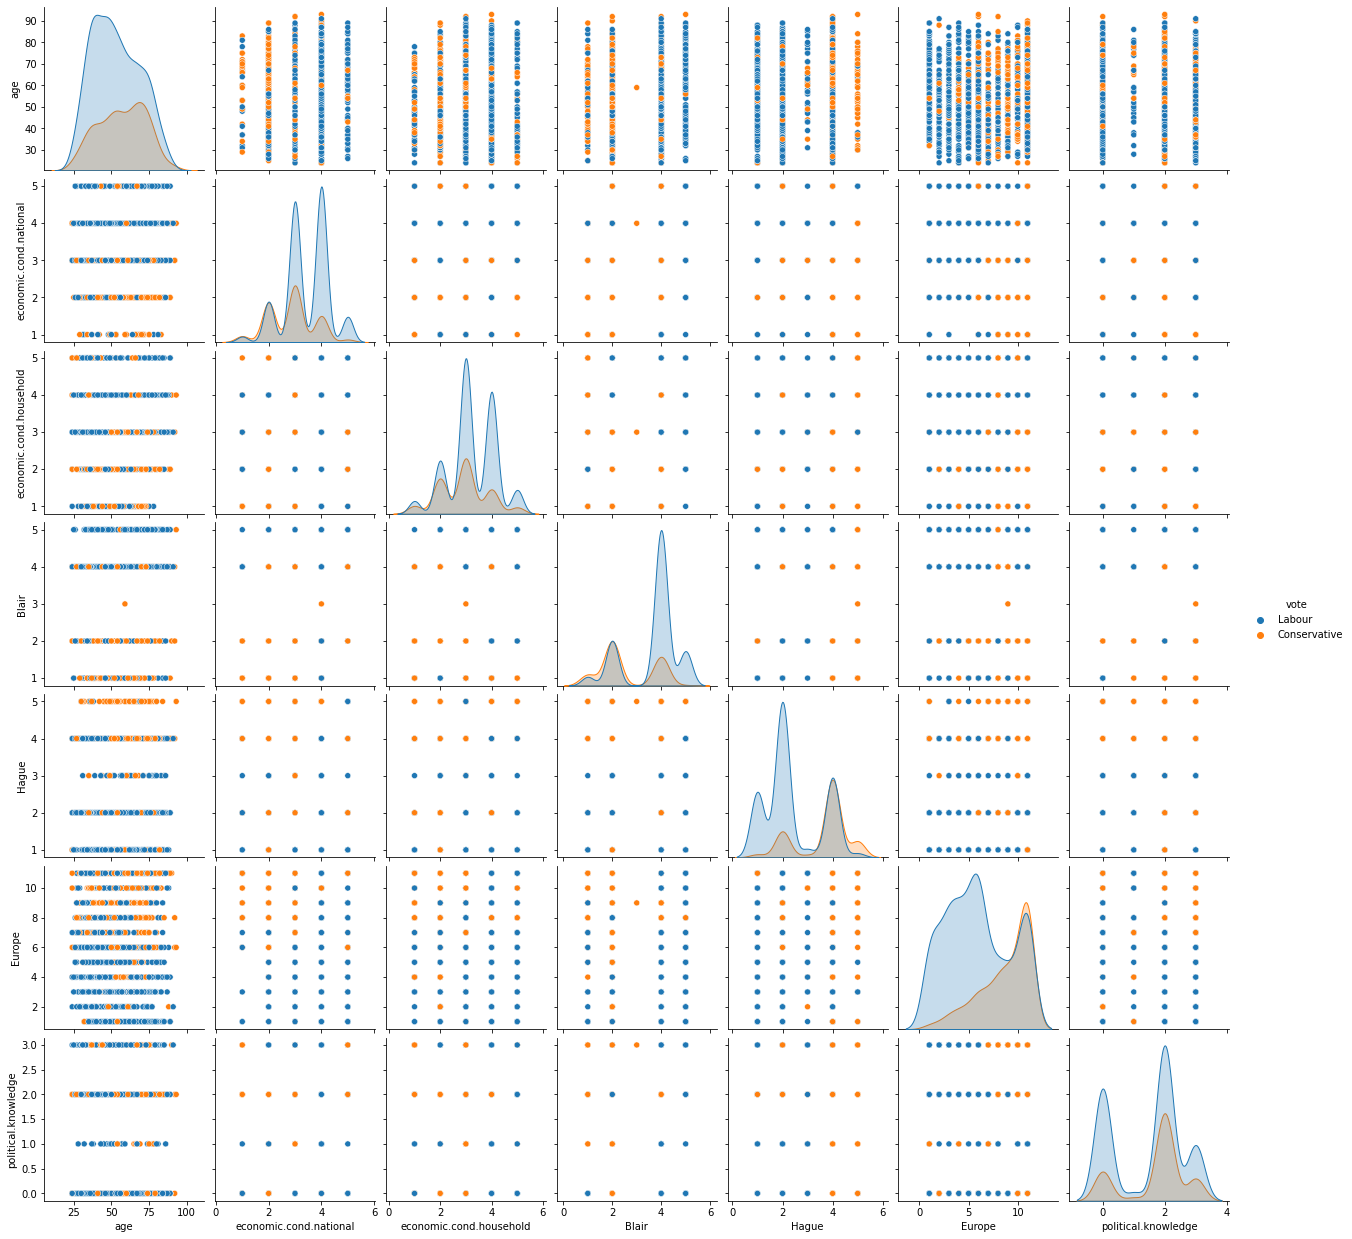

In [61]:
sns.pairplot(data , hue='vote')

In [62]:
cat = ['vote', 'gender']
            

In [63]:
dum =pd.get_dummies(data, columns=cat,drop_first=True)

In [64]:
dum.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [65]:
dum= dum.rename(columns={'vote_Labour':'votelabour_or_not' ,'gender_male':'Male_or_not'},inplace= False)

In [66]:
dum.head(5)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,votelabour_or_not,Male_or_not
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   votelabour_or_not        1525 non-null   uint8
 8   Male_or_not              1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X=dum.drop('votelabour_or_not',axis=1)
Y=dum['votelabour_or_not']

In [72]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [74]:
lg_model=LogisticRegression()
lg_model.fit(X_train,Y_train)
lg_Ytrain_pred=lg_model.predict_proba(X_train)
print("LG Train roc-auc:{}".format(roc_auc_score(Y_train,lg_Ytrain_pred[:,1])))
lg_Ytest_pred=lg_model.predict_proba(X_test)
print("LG Train roc-auc:{}".format(roc_auc_score(Y_test,lg_Ytest_pred[:,1])))


Y_train_predict=lg_model.predict(X_train)
model_score=lg_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

LG Train roc-auc:0.8894209491025327
LG Train roc-auc:0.8825750469043152
0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [80]:
print(sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True , fmt="2g"))

NameError: ignored

the auc 0.889 


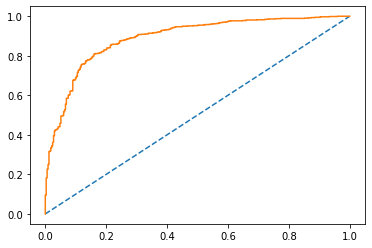

In [81]:
probs_train=lg_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [82]:
Y_test_predict=lg_model.predict(X_test)
model_score=lg_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



the auc curve 0.883 


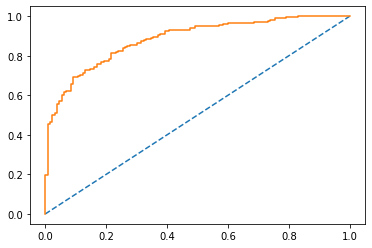

In [83]:
probs_test=lg_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [86]:
Dectree_model= DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

In [87]:
grid_search=GridSearchCV(estimator=Dectree_model,param_grid=param_grid,cv=10)

In [88]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [89]:
GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [90]:
Dectree_model=grid_search.best_estimator_

In [91]:
Dectree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

In [92]:
## Performance Matrix on train data set
Y_train_predict = Dectree_model.predict(X_train)
model_score = Dectree_model.score(X_train, Y_train)
print(model_score)
print(confusion_matrix(Y_train, Y_train_predict))
print(classification_report(Y_train, Y_train_predict))

0.837863167760075


NameError: ignored

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = Dectree_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [ ]:
Y_test_predict = Dectree_model.predict(X_test)
model_score = Dectree_model.score(X_test, Y_test)
print(model_score)
print(confusion_matrix(Y_test, Y_test_predict))
print(classification_report(Y_test, Y_test_predict))

AUC: 0.870


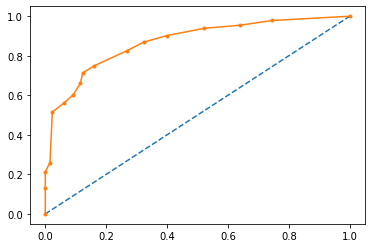

In [93]:
# predict probabilities
probs = Dectree_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Random forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [96]:
RF_model=RandomForestClassifier()

In [97]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [98]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [99]:
GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [100]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [101]:
RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [102]:
Ran_model=grid_search.best_estimator_

In [103]:
Ran_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [104]:
RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [105]:
## Performance Matrix on train data set
Y_train_predict = Ran_model.predict(X_train)
model_score =Ran_model.score(X_train, Y_train)
print(model_score)
print(confusion_matrix(Y_train, Y_train_predict))
print(classification_report(Y_train, Y_train_predict))

0.8388003748828491


NameError: ignored

AUC: 0.906


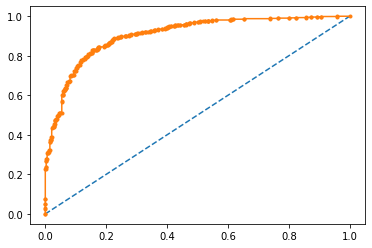

In [106]:
# AUC and ROC for the training data

# predict probabilities
probs = Ran_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [107]:
## Performance Matrix on test data set
Y_test_predict = Ran_model.predict(X_test)
model_score = Ran_model.score(X_test, Y_test)
print(model_score)
print(confusion_matrix(Y_test, Y_test_predict))
print(classification_report(Y_test, Y_test_predict))

0.834061135371179


NameError: ignored

AUC: 0.895


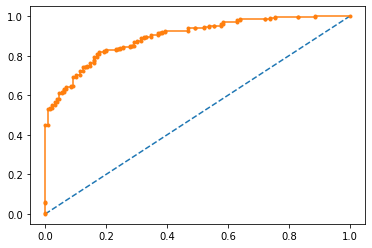

In [108]:
# predict probabilities
probs = Ran_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [109]:
### Accuracy and Comparison of Different models

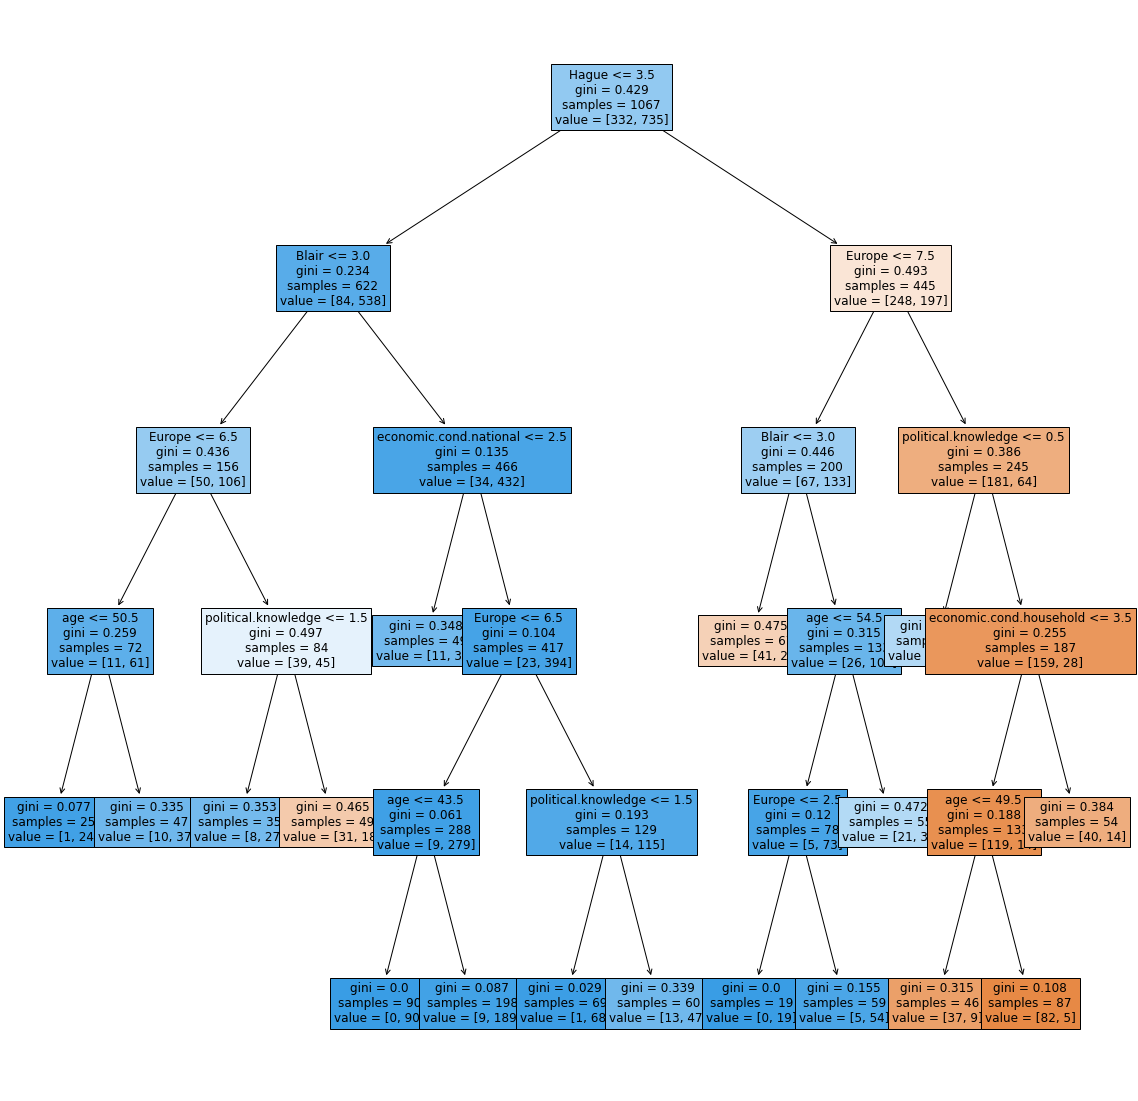

In [110]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(Dectree_model,fontsize=12,feature_names=X_train.columns,filled=True)
plt.show()

In [111]:
### Classification Report

In [112]:
# training accuracy
ypredtrain=Dectree_model.predict(X_train)

from sklearn.metrics import classification_report
print("Training performance")
print(classification_report(Y_train,ypredtrain))

Training performance
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067

